In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
results30 = pd.read_csv(r"libRad30_monochr.csv")
results45 = pd.read_csv(r"libRad45_monochr.csv")
results60 = pd.read_csv(r"libRad60_monochr.csv")

In [28]:
results = results30      
magnitude = "AOD"
component = "Glob_dif"

df = results[results["variable"] == magnitude]

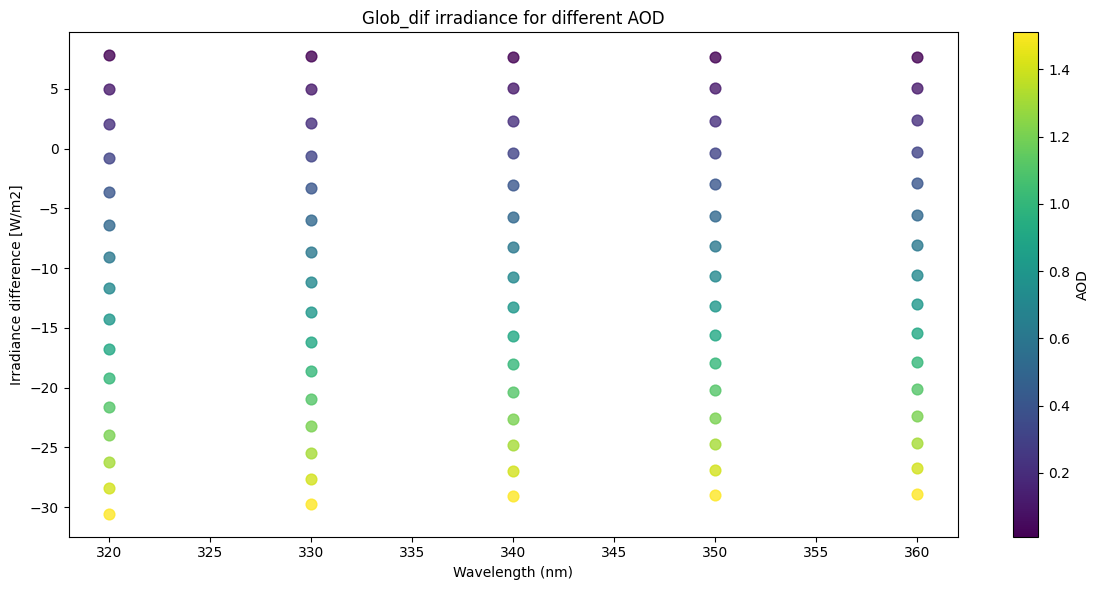

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

values = np.sort(df["value"].unique())
cmap = plt.cm.viridis
norm = plt.Normalize(values.min(), values.max())

for val in values:
    sub = df[df["value"] == val]

    ax.scatter(
        sub["WL"],
        sub[component],
        color=cmap(norm(val)),
        s=60,
        alpha=0.8
    )

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Irradiance difference [W/m2]")
ax.set_title(f"{component} irradiance for different {magnitude}")

# Properly attach colorbar to this Axes
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(magnitude)

plt.tight_layout()
plt.show()
